# Machine Learning for Medicine TP 6
## Dimensionality Reduction | Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Dataset

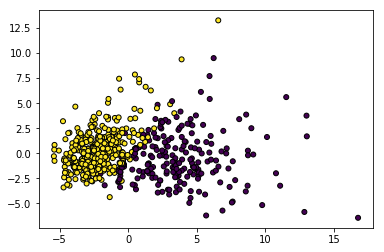

In [2]:
# Breast cancer
X = pd.read_csv('data/Breast.txt',sep=' ')
Y4 = X.values[:,30]==1 # Classes
X4 = X.values[:,0:29] # Observations

X4_pca = PCA(n_components=3).fit_transform(X4)
plt.scatter(X4_pca[:, 0], X4_pca[:, 1], s=25, c=Y4, marker='o', edgecolors='k')
plt.show()

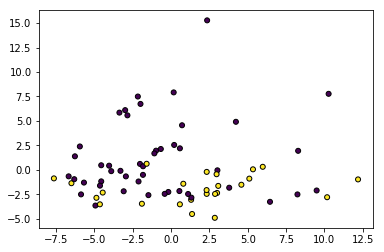

In [3]:
X6 = pd.read_csv('data/Golub_X',sep=' ').values # Observations
Y6 = pd.read_csv('data/Golub_y',sep=' ')['0'] # Classes

X6_pca = PCA(n_components=3).fit_transform(X6)
plt.scatter(X6_pca[:, 0], X6_pca[:, 1], s=25, c=Y6, marker='o', edgecolors='k')
plt.show()

## 1 - 3D PCA plots
### Breast Cancer

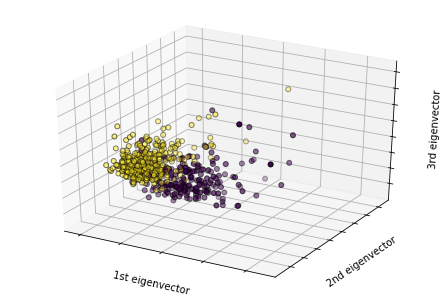

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X4_pca[:, 0], X4_pca[:, 1], X4_pca[:, 2], s=25, c=Y4, marker='o', edgecolors='k')
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

###  Golub

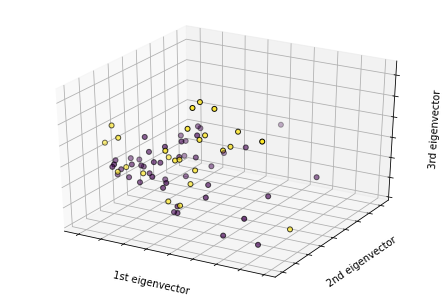

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X6_pca[:, 0], X6_pca[:, 1], X6_pca[:, 2], s=25, c=Y6, marker='o', edgecolors='k')
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()


## 2 - Kernel PCA
### Breast Cancer

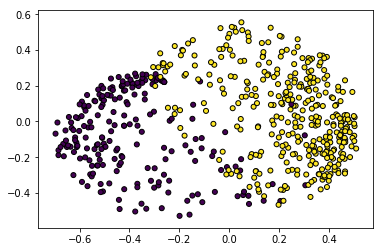

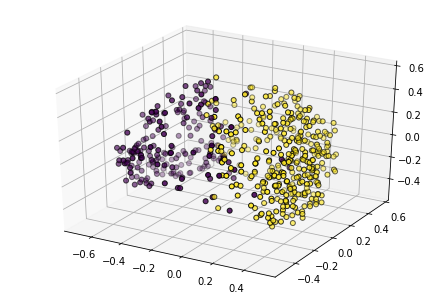

In [6]:
X4_pca = KernelPCA(n_components=3, kernel='rbf').fit_transform(X4, Y4)

plt.scatter(X4_pca[:, 0], X4_pca[:, 1], s=25, c=Y4, marker='o', edgecolors='k')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X4_pca[:, 0], X4_pca[:, 1], X4_pca[:, 2], s=25, c=Y4, marker='o', edgecolors='k')
plt.show()

### Golub

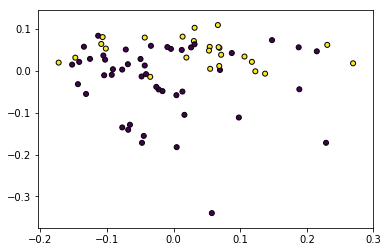

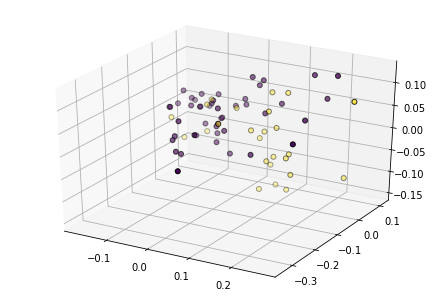

In [7]:
X6_pca = KernelPCA(n_components=3, kernel='rbf').fit_transform(X6, Y6)

plt.scatter(X6_pca[:, 0], X6_pca[:, 1], s=25, c=Y6, marker='o', edgecolors='k')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X6_pca[:, 0], X6_pca[:, 1], X6_pca[:, 2], s=25, c=Y6, marker='o', edgecolors='k')
plt.show()

## 3 - Incremental PCA
### Breast Cancer

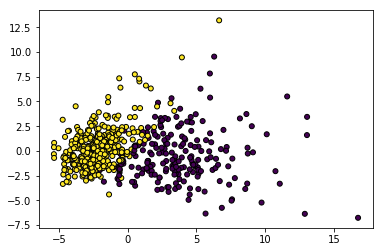

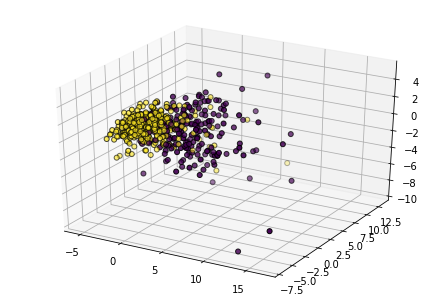

In [8]:
X4_pca = IncrementalPCA(n_components=3, batch_size=5).fit_transform(X4, Y4)

plt.scatter(X4_pca[:, 0], X4_pca[:, 1], s=25, c=Y4, marker='o', edgecolors='k')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X4_pca[:, 0], X4_pca[:, 1], X4_pca[:, 2], s=25, c=Y4, marker='o', edgecolors='k')
plt.show()

### Golub

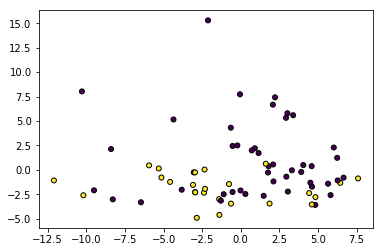

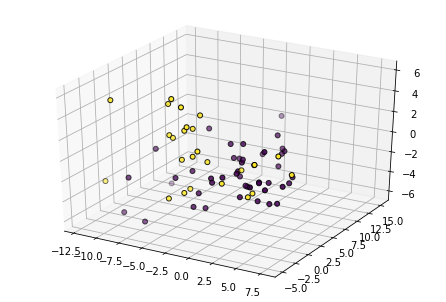

In [9]:
X6_pca = IncrementalPCA(n_components=3, batch_size=5).fit_transform(X6, Y6)

plt.scatter(X6_pca[:, 0], X6_pca[:, 1], s=25, c=Y6, marker='o', edgecolors='k')
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X6_pca[:, 0], X6_pca[:, 1], X6_pca[:, 2], s=25, c=Y6, marker='o', edgecolors='k')
plt.show()

>> On observe que un batch size de 5 suffit a `IncrementalPCA` pour obtenir des resultats comparables à `PCA` 

## 4 - PCA to reduce dimentionality


In [10]:
from sklearn.model_selection import train_test_split, KFold

def score_kfolds(data, labels, clf, transformer=None, folds=20, random_state=None):
    rs = KFold(n_splits=folds, random_state=random_state)
    scores = []
    for train_idx, test_idx in rs.split(data):
        x_train, y_train = data[train_idx], labels[train_idx]
        x_test,  y_test  = data[ test_idx], labels[ test_idx]
        if transformer is not None:
            tr = transformer.fit(x_train, y_train)
            x_train = tr.transform(x_train)
            x_test  = tr.transform(x_test)
        sc = clf.fit(x_train, y_train).score(x_test, y_test)
        scores.append(sc)
    return np.mean(scores)


### Breast cancer

n_comp | Logistic | SVM
     1 | 0.913818 | 0.912048
     2 | 0.950769 | 0.938472
     3 | 0.943704 | 0.927915
     4 | 0.96485 | 0.945443
     5 | 0.970113 | 0.938395
    10 | 0.970113 | 0.964804
    20 | 0.973622 | 0.970098
    29 | 0.975392 | 0.973638
no PCA | 0.975392 | 0.973638


[]

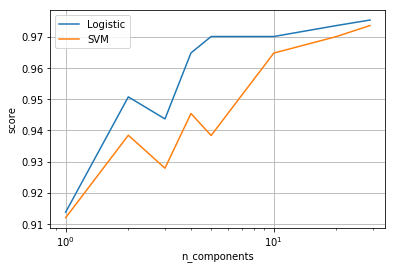

In [11]:
data, labels = X4, Y4

log = LogisticRegression(solver='lbfgs')
svc = SVC(gamma='auto')

params = [1,2,3,4,5,10,20,29, 'no PCA']
scores = np.zeros((len(params), 2))

for i, n_components in enumerate(params):
    if isinstance(n_components, int):
        pca = PCA(n_components=n_components)
    else: 
        pca = None
    scores[i, 0] = score_kfolds(data, labels, log, transformer=pca, folds=5, random_state=12)
    scores[i, 1] = score_kfolds(data, labels, svc, transformer=pca, folds=5, random_state=12)

print('n_comp | Logistic | SVM')
for p, s in zip(params, scores):
    print('{:6} | {:.6} | {:.6}'.format(p, s[0], s[1]))
    
plt.plot(params[:-1], scores[:-1,0], label='Logistic')
plt.plot(params[:-1], scores[:-1,1], label='SVM')
plt.xscale('log')
plt.xlabel('n_components')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.plot()


>> Sur le dataset Breast cancer on constate que la réduction de dimention via PCA n'améliore pas le score même si dans le cas de la regression logistique, seulement 5 composantes permettent d'approches le score maximal (qui utilise toutes les 29 composantes).

### Golub

n_comp | Logistic | SVM
     1 | 0.57619 | 0.646667
     2 | 0.547619 | 0.689524
     3 | 0.67619 | 0.66
     5 | 0.719048 | 0.577143
    10 | 0.84381 | 0.645714
    20 | 0.857143 | 0.646667
    30 | 0.842857 | 0.632381
no PCA | 0.828571 | 0.642857


[]

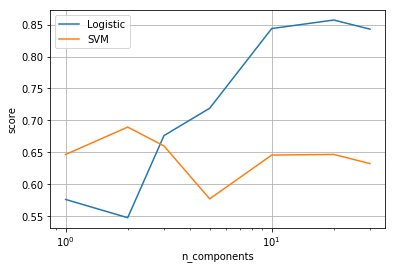

In [12]:
data, labels = X6, Y6

log = LogisticRegression(solver='lbfgs')
svc = SVC(gamma='auto')

params = [1,2,3,5,10,20,30, 'no PCA']
scores = np.zeros((len(params), 2))

for i, n_components in enumerate(params):
    if isinstance(n_components, int):
        pca = PCA(n_components=n_components)
    else: 
        pca = None
    scores[i, 0] = score_kfolds(data, labels, log, transformer=pca, folds=5, random_state=12)
    scores[i, 1] = score_kfolds(data, labels, svc, transformer=pca, folds=5, random_state=12)

print('n_comp | Logistic | SVM')
for p, s in zip(params, scores):
    print('{:6} | {:.6} | {:.6}'.format(p, s[0], s[1]))
    
plt.plot(params[:-1], scores[:-1,0], label='Logistic')
plt.plot(params[:-1], scores[:-1,1], label='SVM')
plt.xscale('log')
plt.xlabel('n_components')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.plot()


>> Sur le dataset Golub on constate que avec un regresseur logistique on obtiens le meilleur score en réduisant à 20 le nombre de features grace à une PCA. Aussi on constate que seulement 10 features suffisent pour obtenir le même score que lorsque toutes les features sont utilisées.

>> Avec un SVC, c'est en n'utilisant que les 2 composantes principales que on obtiens le meilleur score.

## 5 - LDA vs PCA

### Breast cancer

n_comp | PCA+Logistic | PCA+SVM      | LDA+Logistic | LDA+SVM
     1 | 0.9138177302 | 0.9120478187 | 0.9666045645 | 0.9683434249
     2 | 0.9507685142 | 0.9384722869 | 0.9666045645 | 0.9683434249
     3 | 0.9437043937 | 0.92791492 | 0.9666045645 | 0.9683434249
     4 | 0.9648501785 | 0.9454432542 | 0.9666045645 | 0.9683434249
     5 | 0.9701133364 | 0.9383946592 | 0.9666045645 | 0.9683434249
    10 | 0.9701133364 | 0.9648036019 | 0.9666045645 | 0.9683434249
    15 | 0.9736221084 | 0.9683278994 | 0.9666045645 | 0.9683434249
    20 | 0.9736221084 | 0.9700978109 | 0.9666045645 | 0.9683434249
    29 | 0.9753920199 | 0.9736376339 | 0.9666045645 | 0.9683434249


[]

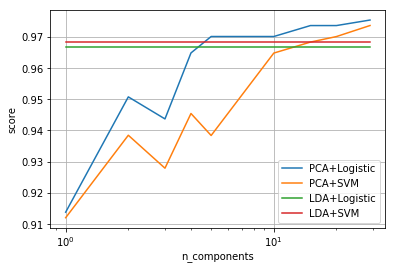

In [13]:
data, labels = X4, Y4

log = LogisticRegression(solver='lbfgs')
svc = SVC(gamma='auto')

params = [1,2,3,4,5,10,15,20,29]
scores = np.zeros((len(params), 4))

for i, n_components in enumerate(params):
    pca = PCA(n_components=n_components)
    scores[i, 0] = score_kfolds(data, labels, log, transformer=pca, folds=5, random_state=12)
    scores[i, 1] = score_kfolds(data, labels, svc, transformer=pca, folds=5, random_state=12)
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    scores[i, 2] = score_kfolds(data, labels, log, transformer=lda, folds=5, random_state=12)
    scores[i, 3] = score_kfolds(data, labels, svc, transformer=lda, folds=5, random_state=12)

print('n_comp | PCA+Logistic | PCA+SVM      | LDA+Logistic | LDA+SVM')
for p, s in zip(params, scores):
    print('{:6} | {:.10} | {:.10} | {:.10} | {:.10}'.format(p, s[0], s[1], s[2], s[3]))
    
plt.plot(params, scores[:,0], label='PCA+Logistic')
plt.plot(params, scores[:,1], label='PCA+SVM')
plt.plot(params, scores[:,2], label='LDA+Logistic')
plt.plot(params, scores[:,3], label='LDA+SVM')
plt.xscale('log')
plt.xlabel('n_components')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.plot()


>> On constate que on obtiens systématiquement le même score avec `LinearDiscriminantAnalysis`. 
En effet d'après la doc de la fonction, *`n_components` will be set to min(n_classes - 1, n_features)*.
Dans notre cas nous avons 2 classes donc `n_components` est systématiquement ramené à 1 et les vecteurs sortant de `LinearDiscriminantAnalysis` ont 1 feature.

>> Donc on observe que dans le cas `LogisticRegression`, LDA obtiens, avec une feature, un score similaire à PCA avec 4/5 features.
Dans le cas `SVM`, il faut 15 composantes PCA pour obtenir un score similaire à LDA.


### Golub

n_comp | PCA+Logistic | PCA+SVM      | LDA+Logistic | LDA+SVM
     2 | 0.5476190476 | 0.6895238095 | 0.760952381 | 0.7761904762
     5 | 0.719047619 | 0.5771428571 | 0.760952381 | 0.7761904762
     6 | 0.7466666667 | 0.619047619 | 0.760952381 | 0.7761904762
     7 | 0.7752380952 | 0.6038095238 | 0.760952381 | 0.7761904762
     8 | 0.8438095238 | 0.6466666667 | 0.760952381 | 0.7761904762
    10 | 0.8295238095 | 0.66 | 0.760952381 | 0.7761904762
    20 | 0.8714285714 | 0.660952381 | 0.760952381 | 0.7761904762
    30 | 0.8428571429 | 0.6323809524 | 0.760952381 | 0.7761904762
    40 | 0.8428571429 | 0.6180952381 | 0.760952381 | 0.7761904762
    56 | 0.8285714286 | 0.6752380952 | 0.760952381 | 0.7761904762


[]

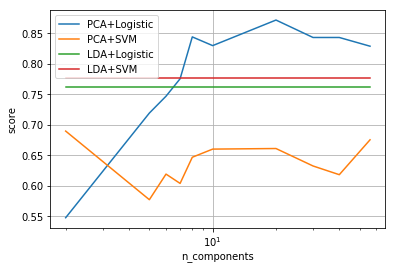

In [15]:
###### remove warnings : ######
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
###############################

data, labels = X6, Y6

log = LogisticRegression(solver='lbfgs')
svc = SVC(gamma='auto')

params = [2,5,6,7,8,10,20,30, 40, 56]
scores = np.zeros((len(params), 4))

for i, n_components in enumerate(params):
    pca = PCA(n_components=n_components)
    scores[i, 0] = score_kfolds(data, labels, log, transformer=pca, folds=5, random_state=12)
    scores[i, 1] = score_kfolds(data, labels, svc, transformer=pca, folds=5, random_state=12)
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    scores[i, 2] = score_kfolds(data, labels, log, transformer=lda, folds=5, random_state=12)
    scores[i, 3] = score_kfolds(data, labels, svc, transformer=lda, folds=5, random_state=12)

print('n_comp | PCA+Logistic | PCA+SVM      | LDA+Logistic | LDA+SVM')
for p, s in zip(params, scores):
    print('{:6} | {:.10} | {:.10} | {:.10} | {:.10}'.format(p, s[0], s[1], s[2], s[3]))
    
plt.plot(params, scores[:,0], label='PCA+Logistic')
plt.plot(params, scores[:,1], label='PCA+SVM')
plt.plot(params, scores[:,2], label='LDA+Logistic')
plt.plot(params, scores[:,3], label='LDA+SVM')
plt.xscale('log')
plt.xlabel('n_components')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.plot()


>> Ici, même remarque, il y a 2 classes donc `n_components` est systématiquement ramené à 1 et les vecteurs sortant de `LinearDiscriminantAnalysis` ont 1 feature.

>> Donc on observe que dans le cas `LogisticRegression`, LDA obtiens, avec une feature, un score similaire à PCA avec 7 composantes.
Dans le cas `SVM`, on observe systématiquement un score supérieur avec la composante LDA.


**6 - Which data set is “easier” for prediction, i.e., in which data sets the classes are better separated?**

>> Le dataset Breast cancer est plus simple. On obtiens systématiquement de meileurs scores dessus.
La visualisation PCA 2D suffit à constater que les données sont plus facillement séparables dans ce dataset que dans Golub.

**7 - Was it useful to reduce the dimension of the original problems before running classification?
Are the error rates of the models learned from the reduced data smaller than ones from the
original (high-dimensional) data?**

>> Sur le dataset Breast cancer, non. On constate que les scores obtenus sur les datasets réduits sont inférieurs ou égaux à celui sur le dataset complet. Tandis que sur Golub, la réduction de dimention permet d'améliorer le score. Cette différence entre les datasets vient du fait que l'un contient déjà peu de features et l'autre non (29 contre  3562).